<a href="https://colab.research.google.com/github/dancher00/Experimental-Data-Analysis/blob/main/relationship_between_solar_radio_flux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from scipy.stats import pearsonr
from scipy.ndimage import shift
from google.colab import files

# Assignment 1.
# The relationship between solar radio flux F10.7 and sunspot number

#### Team 1:
-Zargham Ali Mirza(left the course): learned how to properly code using numpy, helped with linear algebra\
-Roman Khalikov: Fixed plots, added fast numpy matrix calculations, overall styling of report\
-Danil Belov: Made a draft of all the code and plots\
Skoltech, 03.10.2023

### 2. Montlhy mean sunspot number and solar radio flux F10.7cm measurements downloading

In [ ]:
uploaded = files.upload()

Saving data_group1.txt to data_group1.txt


### 3. Visual representation of data

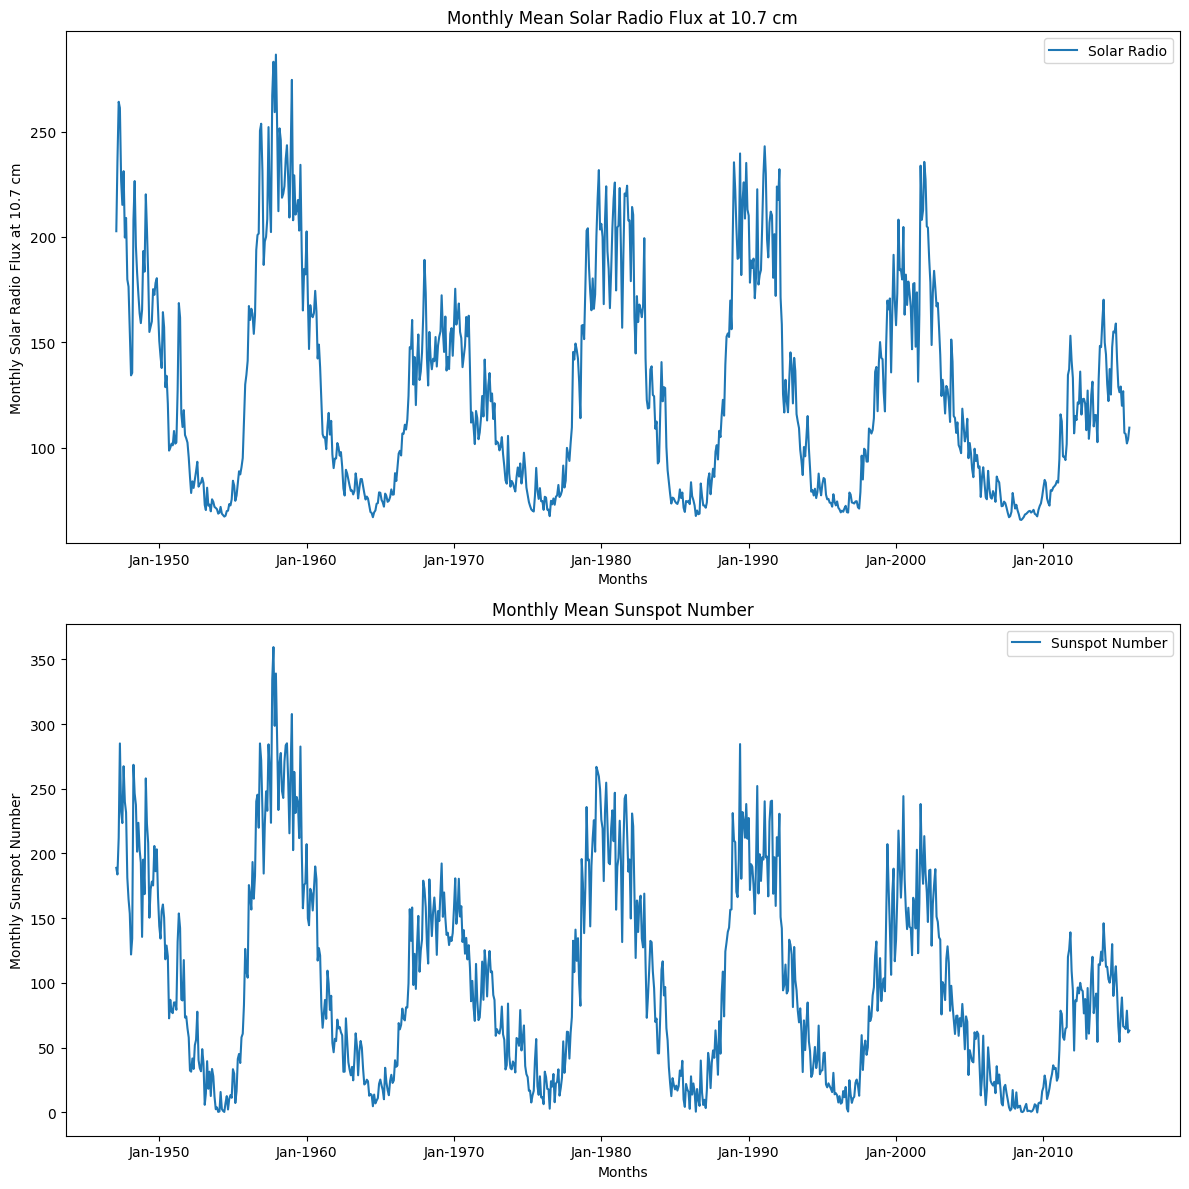

In [ ]:
df = pd.read_csv("data_group1.txt", delimiter="\s+", header=None, names=["Year", "Month", "Solar_Radio", "Sunspot_Number"])

monthly_mean = df[["Solar_Radio", "Sunspot_Number"]]
# We need datetime so we make a new col based on Year and Month
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
date = df["Date"]

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(date, monthly_mean["Solar_Radio"], label="Solar Radio")
plt.title("Monthly Mean Solar Radio Flux at 10.7 cm")
plt.xlabel("Months")
plt.ylabel("Monthly Solar Radio Flux at 10.7 cm")
plt.legend()
myFmt = mdates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.subplot(2, 1, 2)
plt.plot(date, monthly_mean["Sunspot_Number"], label="Sunspot Number")
plt.title("Monthly Mean Sunspot Number")
plt.xlabel("Months")
plt.ylabel("Monthly Sunspot Number")
plt.legend()
myFmt = mdates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.tight_layout()
plt.show()

This is the given Montly Sunspot Number and Monthly Solar Radio Flux at 10.7 cm data. We can notice that both plots looks very similar, let's check the correlation.

### 4. Scatter plot between monthly mean sunspot number and solar radio flux F10.7 cm

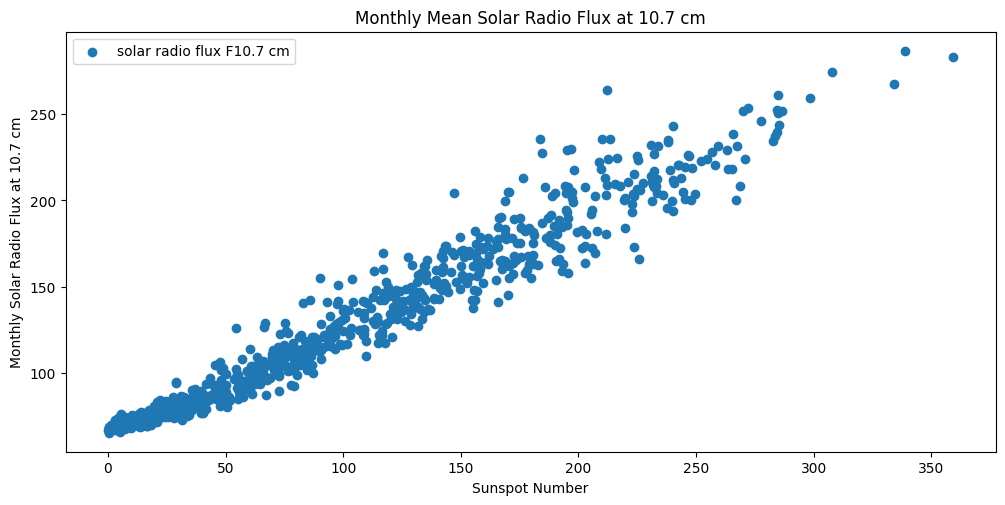

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.scatter(df["Sunspot_Number"], df["Solar_Radio"], label = "solar radio flux F10.7 cm")
plt.title("Monthly Mean Solar Radio Flux at 10.7 cm")
plt.xlabel("Sunspot Number")
plt.ylabel("Monthly Solar Radio Flux at 10.7 cm")
plt.legend()
plt.show()


We definitely can see the positive correlation, let's calculate it and plot the line.

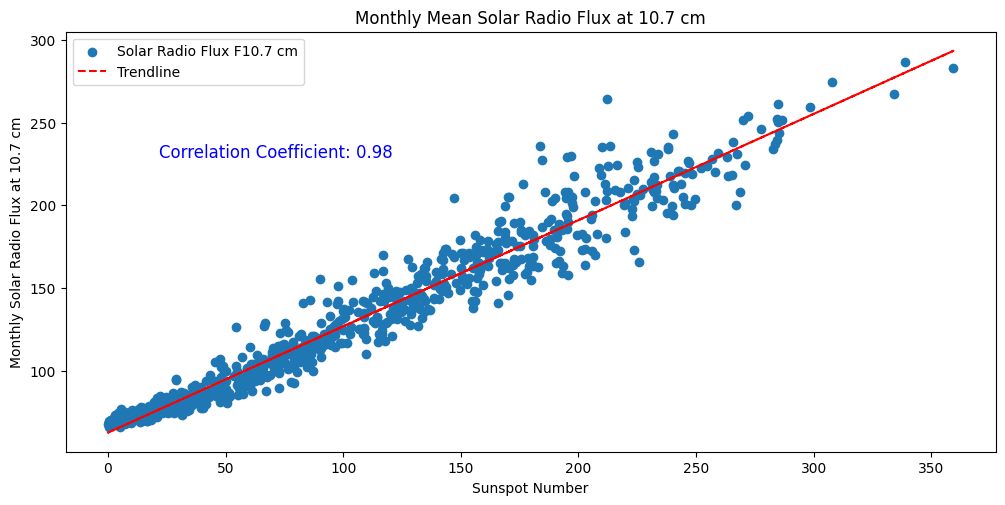

In [ ]:
plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.scatter(df["Sunspot_Number"], df["Solar_Radio"], label="Solar Radio Flux F10.7 cm")
plt.title("Monthly Mean Solar Radio Flux at 10.7 cm")
plt.xlabel("Sunspot Number")
plt.ylabel("Monthly Solar Radio Flux at 10.7 cm")
plt.legend()

z = np.polyfit(df["Sunspot_Number"], df["Solar_Radio"], 1)
p = np.poly1d(z)
plt.plot(df["Sunspot_Number"], p(df["Sunspot_Number"]), "r--", label="Trendline")

correlation_coefficient, _ = pearsonr(df["Sunspot_Number"], df["Solar_Radio"])

plt.text(
    0.1,
    0.7,
    f"Correlation Coefficient: {correlation_coefficient:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    color="blue",
)

plt.legend()
plt.show()

So we proofed that the data is highly correlated between each other.

5.

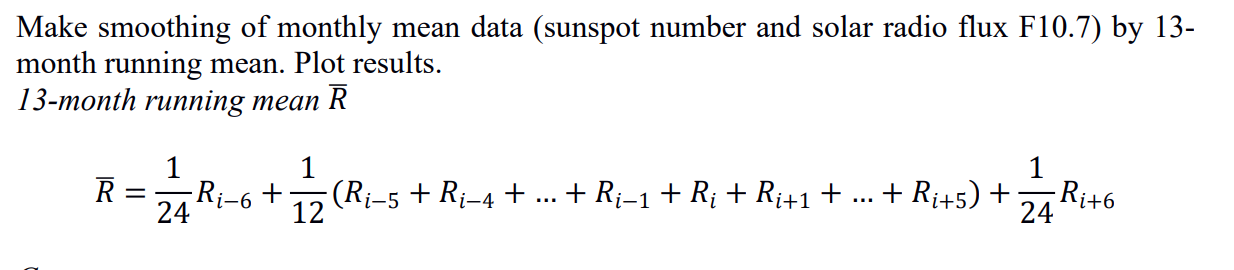

In [ ]:
# 13-month running mean function
def R_13_month(z):
    result = np.zeros_like(z)
    for i in range(-5,6):
        result = result + shift(z, i)/12
    result = result + shift(z, -6)/24 + shift(z, 6)/24
    return result

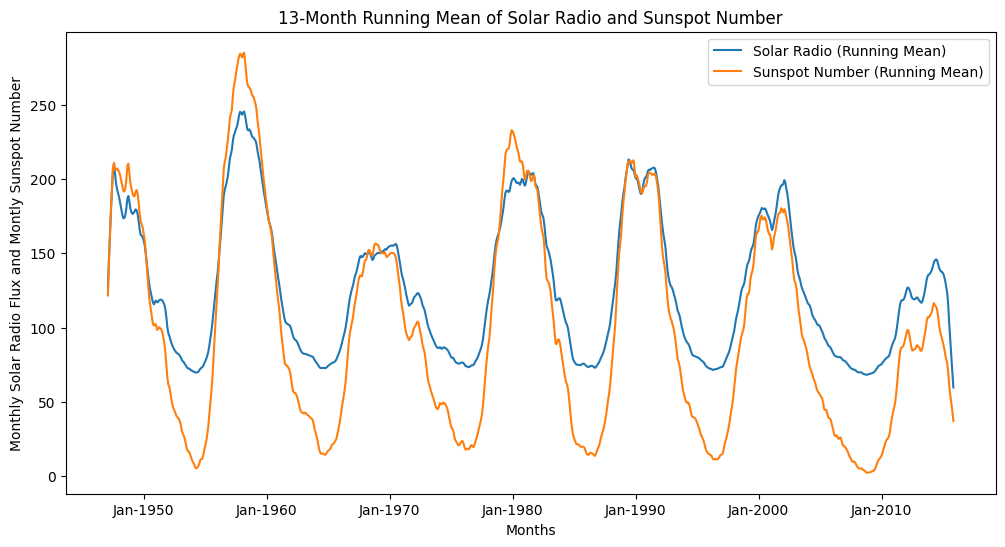

In [ ]:
# Applying 13-mont running mean R
df["Solar_Radio_Running_Mean"] = R_13_month(df["Solar_Radio"].to_numpy())
df["Sunspot_Number_Running_Mean"] = R_13_month(df["Sunspot_Number"].to_numpy())

plt.figure(figsize=(12, 6))

plt.plot(date, df["Solar_Radio_Running_Mean"], label="Solar Radio (Running Mean)")
plt.plot(date, df["Sunspot_Number_Running_Mean"], label="Sunspot Number (Running Mean)")
myFmt = mdates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.title("13-Month Running Mean of Solar Radio and Sunspot Number")
plt.xlabel("Months")
plt.ylabel("Monthly Solar Radio Flux and Montly Sunspot Number")
plt.legend()

plt.show()

13-month running mean smoothed the data, we can see with our own eyes, that there is obvious relation between Solar Radio Flux and Sunspot Number data so we can try to use multidimensional linear regression

6., 7., 8., 9.

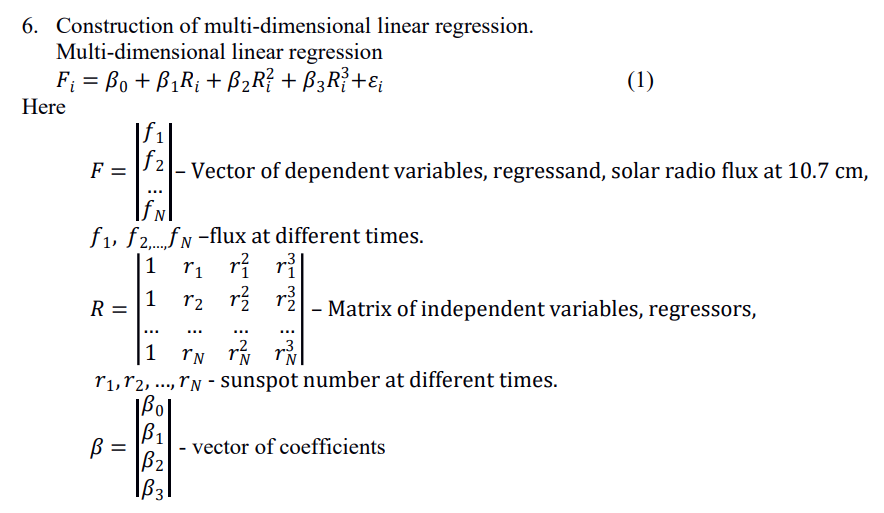

Coefficients (beta values):
beta_0: 65.49314451430429
beta_1: 0.4698636189574799
beta_2: 0.0016195387349498278
beta_3: -3.878243761489376e-06


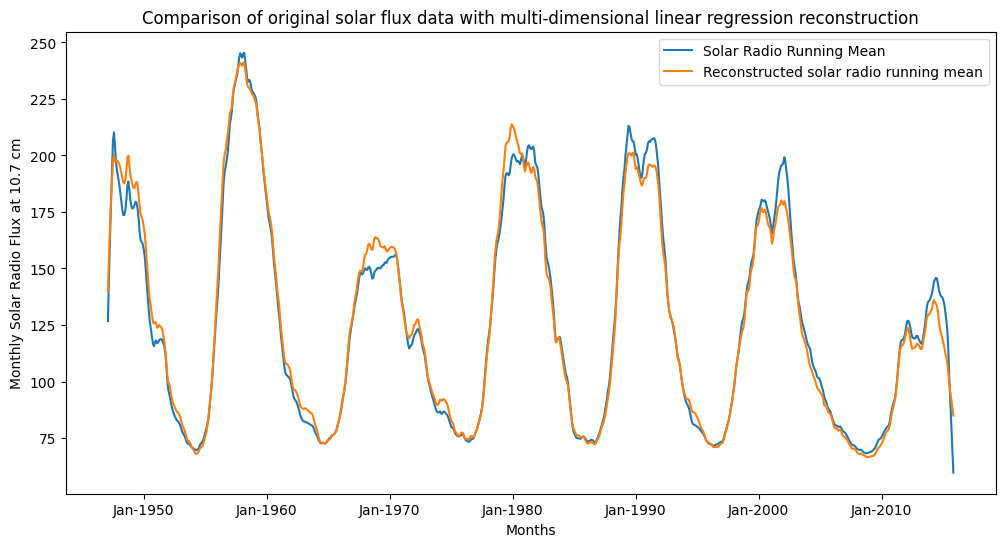

In [ ]:
# Matrix of regressors vector
R = np.array([np.ones_like(df["Sunspot_Number_Running_Mean"]), df["Sunspot_Number_Running_Mean"], df["Sunspot_Number_Running_Mean"]**2, df["Sunspot_Number_Running_Mean"]**3]).T
# Vector of regressands
F = df["Solar_Radio_Running_Mean"].to_numpy()
# Vector of coefficients
beta = np.linalg.inv(R.T @ R) @ R.T @ F

print("Coefficients (beta values):")
print("beta_0:", beta[0])
print("beta_1:", beta[1])
print("beta_2:", beta[2])
print("beta_3:", beta[3])

reconstructed_flux = beta @ R.T

plt.figure(figsize=(12, 6))

plt.plot(date, df["Solar_Radio_Running_Mean"], label="Solar Radio Running Mean")
plt.plot(date, reconstructed_flux, label="Reconstructed solar radio running mean")
myFmt = mdates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.title("Comparison of original solar flux data with multi-dimensional linear regression reconstruction")
plt.xlabel("Months")
plt.ylabel("Monthly Solar Radio Flux at 10.7 cm")
plt.legend()

plt.show()

The reconstructed solar radio seems almost like the real one. Multidimensional linear regression was able to reconstruct solar flux data using only infromation from correlated sunspot number

10.

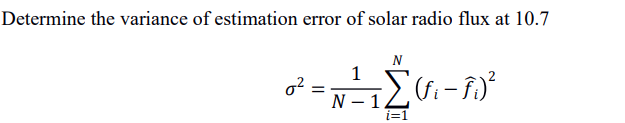

In [ ]:
sigma = ((df["Solar_Radio_Running_Mean"].to_numpy()-reconstructed_flux)**2).sum()/(len(reconstructed_flux)-1)
print(f'Variance = {sigma}')

Variance = 34.62703858034031


The error is pretty small, so the reconstruction is accurate enough

# Conclusion

In this assignment our team learned that we can analyze the data using simple methods like looking for the correlation between data, visually analyze the smoothed curves of the data to make a decision on a method to reconstruct the data. We learned that it is possible to use one type of data to precisely predict another type of data using multidimensional linear regression. Additionally our team members learned some new ways on how to deal with numpy arrays calculations. This learnings can help us in the future to analyze the existing data, smooth it for the next analysis/reconstruction and actually easily predict some simple real data. While we performed this assignment we tried different methods of time series data and arrays calculations, learned on how to deal with datetime format in matplotlib.